Enter path to black image: black.png


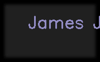

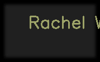

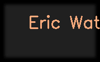

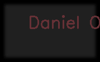

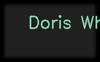

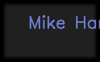

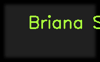

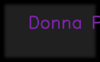

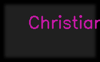

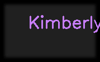

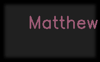

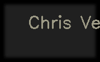

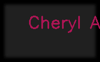

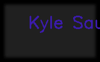

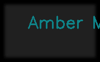

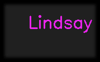

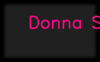

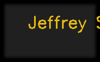

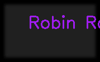

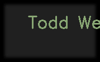

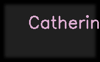

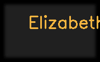

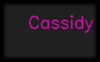

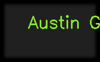

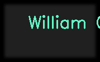

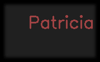

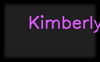

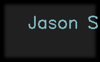

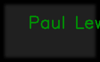

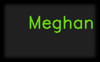

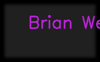

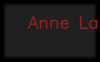

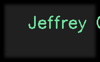

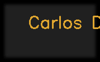

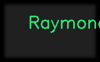

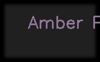

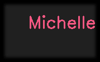

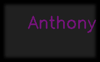

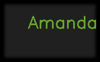

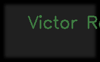

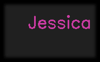

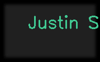

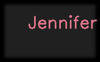

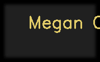

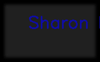

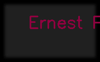

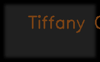

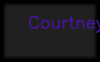

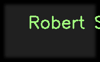

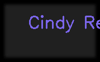

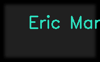

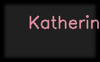

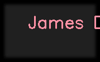

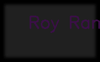

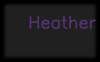

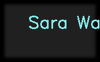

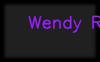

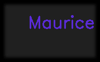

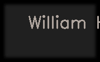

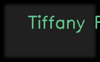

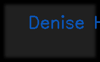

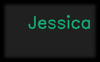

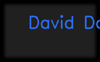

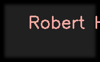

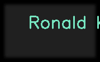

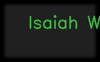

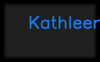

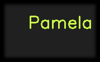

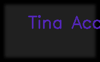

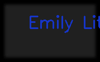

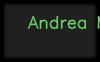

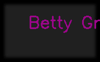

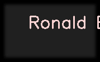

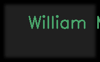

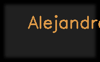

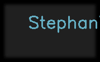

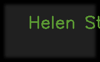

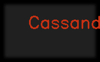

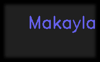

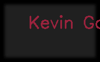

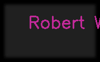

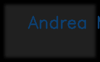

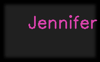

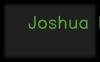

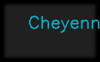

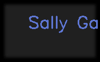

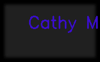

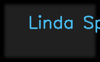

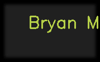

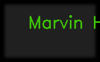

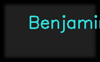

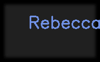

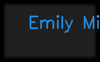

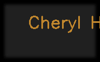

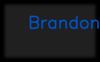

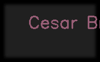

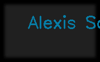

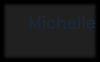

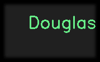

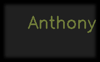

,image_path
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


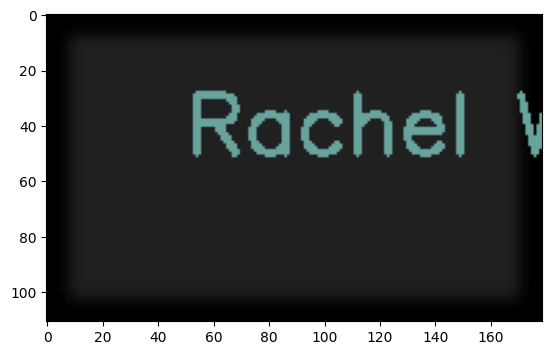

In [9]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np
from faker import Faker
import cv2

# Ask user to input a black image
img_path = input("Enter path to black image: ")

# Create a Faker object
fake = Faker()

# Load the black image
img = cv2.imread(img_path)

# Create an empty list to store the signature images
signature_images = []

# Loop through 100 signatures
for i in range(100):
    
    # Generate a signature name using faker
    signature_name = fake.name()
    
    # Create a copy of the black image
    signature_img = img.copy()
    
    # Generate a random color for the signature text
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    
    # Add the signature text to the image
    cv2.putText(signature_img, signature_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    
    # Add the signature image to the list
    signature_images.append(signature_img)
    
# Display all the signature images
for i, signature_img in enumerate(signature_images):
    cv2.imshow(f"Signature {i+1}", signature_img)   
    k=cv2.waitKey(0)
    if k==ord('s'):
        break
plt.imshow(signature_img)

cv2.destroyAllWindows()

# Create an empty list to store the image paths
image_paths = []

# Loop through the signature images and save them
for i, signature_img in enumerate(signature_images):
    image_path = f"signature_{i}.png"
    cv2.imwrite(image_path, signature_img)
    image_paths.append(image_path)

# Create a dataframe with the image paths
df = pd.DataFrame({"image_path": image_paths})

# Define a function to display the image in a cell of a dataframe
def show_image(image_path):
    img = Image.open(image_path)
    img.thumbnail((100, 100))
    display(img)

# Display the dataframe with the images
HTML(df.to_html(escape=False , formatters=dict(image_path=show_image)))
